# Importing required libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,BatchNormalization
from keras import metrics,optimizers
from keras.regularizers import l2

# Reading the training dataset

In [4]:
df = pd.read_csv('INDUSINDBK.csv',index_col='Date',parse_dates=True)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-03-01,INDUSINDBK,EQ,26.80,28.90,28.95,28.00,28.95,28.95,28.69,107224,3.075830e+11,NaN,NaN,NaN
2000-04-01,INDUSINDBK,EQ,28.95,30.85,31.25,27.90,30.60,30.25,29.12,182693,5.320730e+11,NaN,NaN,NaN
2000-05-01,INDUSINDBK,EQ,30.25,29.90,30.00,27.85,28.45,28.15,28.72,162820,4.675720e+11,NaN,NaN,NaN
2000-06-01,INDUSINDBK,EQ,28.15,29.25,29.35,27.95,27.95,28.00,28.55,87901,2.510010e+11,NaN,NaN,NaN
2000-07-01,INDUSINDBK,EQ,28.00,27.20,28.00,26.50,27.20,27.05,27.09,65684,1.779190e+11,NaN,NaN,NaN


In [5]:
df['Open'].isna().sum()

0

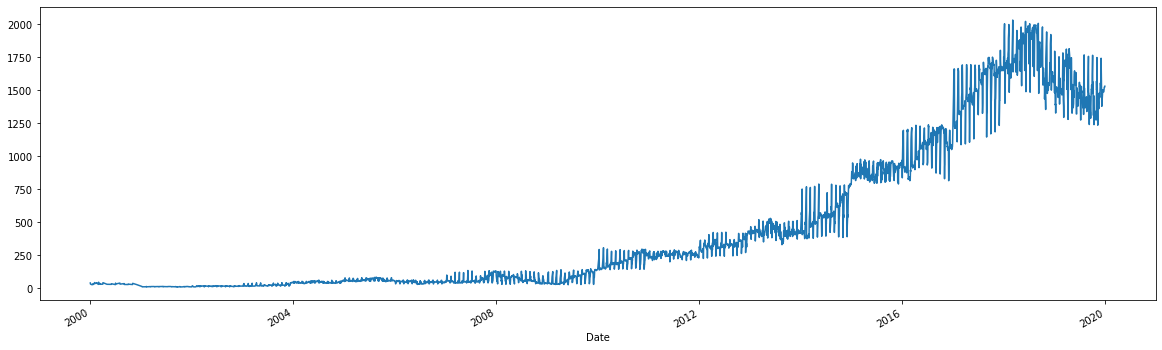

In [6]:
df['Open'].plot(figsize=(20,6))

# Preprocessing the dataset

This step includes :-

i)Spliting our dataset into x and y subset

ii)Preparing x to feed in RNN with sequential leangth of 60 

In [7]:
df = np.array(df['Open'])
x,y=([],[])
seq_len = 60
for i in range(seq_len,df.shape[0]):
    x.append(df[i-seq_len:i])
    y.append(df[i])
    
x = np.array(x)
x = x.reshape((x.shape[0],x.shape[1],1))
y = np.array(y)
y = y.reshape((y.shape[0],1))

# Initialising model

We are using 

i) Sequential model with three LSTM layer and one dense layer

ii) Batchnormalization to prevent overfitting

In [8]:
model = Sequential()
model.add(LSTM(64,input_shape=(x.shape[1],x.shape[2]),return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(64,return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(64))
model.add(BatchNormalization())
model.add(Dense(1))

# Compiling model

We are using mean squared error loss function and root mean squared error for metrics evaluation with adam optimizer

In [9]:
model.compile(loss='mse',optimizer='adam',metrics=[metrics.RootMeanSquaredError(name='RMSE')])
optimizers.adam(lr=3e-3)

# Fitting model


Epoch 1/100
4593/4593 [==============================] - 8s 2ms/step - loss: 546515.8708 - RMSE: 739.2672
Epoch 2/100
4593/4593 [==============================] - 7s 1ms/step - loss: 535705.5030 - RMSE: 731.9190
Epoch 3/100
4593/4593 [==============================] - 8s 2ms/step - loss: 524136.2948 - RMSE: 723.9725
Epoch 4/100
4593/4593 [==============================] - 8s 2ms/step - loss: 510475.7482 - RMSE: 714.4758
Epoch 5/100
4593/4593 [==============================] - 8s 2ms/step - loss: 495110.0617 - RMSE: 703.6405
Epoch 6/100
4593/4593 [==============================] - 7s 2ms/step - loss: 476628.3273 - RMSE: 690.3827
Epoch 7/100
4593/4593 [==============================] - 8s 2ms/step - loss: 456095.6086 - RMSE: 675.3485
Epoch 8/100
4593/4593 [==============================] - 8s 2ms/step - loss: 434594.0275 - RMSE: 659.2375
Epoch 9/100
4593/4593 [==============================] - 8s 2ms/step - loss: 410614.6217 - RMSE: 640.7922
Epoch 10/100
4593/4593 [=====================

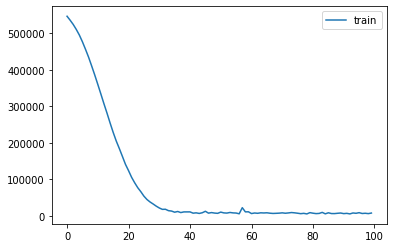

In [10]:
history=model.fit(x,y,epochs=100,batch_size=64)
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()
pyplot.show()

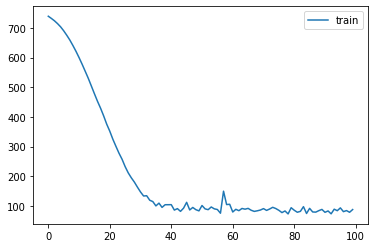

In [11]:
pyplot.plot(history.history['RMSE'], label='train')
pyplot.legend()
pyplot.show()

# Evaluating performance of our trained model

Now we evaluate performance of our trained model on different datasets

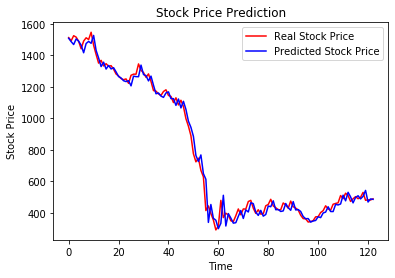

In [12]:
sf = pd.read_csv('INDUSINDBK-TEST.csv',index_col='Date',parse_dates=True)

sf = np.array(sf['Open'])
x_test,y_test=([],[])
seq_len = 60
for i in range(seq_len,sf.shape[0]):
    x_test.append(sf[i-seq_len:i])
    y_test.append(sf[i])
    
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))
y_test = np.array(y_test)
y_test = y_test.reshape((y_test.shape[0],1))

predicted_stock_prices = model.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Stock Price')
pyplot.plot(predicted_stock_prices, color = 'blue', label = 'Predicted Stock Price')
pyplot.title('Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Stock Price')
pyplot.legend()
pyplot.show()

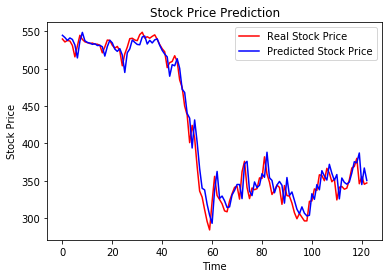

In [13]:
sf = pd.read_csv('ICICIBANK-TEST.csv',index_col='Date',parse_dates=True)

sf = np.array(sf['Open'])
x_test,y_test=([],[])
seq_len = 60
for i in range(seq_len,sf.shape[0]):
    x_test.append(sf[i-seq_len:i])
    y_test.append(sf[i])
    
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))
y_test = np.array(y_test)
y_test = y_test.reshape((y_test.shape[0],1))

predicted_stock_prices = model.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Stock Price')
pyplot.plot(predicted_stock_prices, color = 'blue', label = 'Predicted Stock Price')
pyplot.title('Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Stock Price')
pyplot.legend()
pyplot.show()

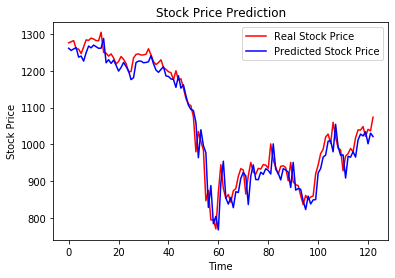

In [14]:
sf = pd.read_csv('HDFCBANK-TEST.csv',index_col='Date',parse_dates=True)

sf = np.array(sf['Open'])
x_test,y_test=([],[])
seq_len = 60
for i in range(seq_len,sf.shape[0]):
    x_test.append(sf[i-seq_len:i])
    y_test.append(sf[i])
    
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))
y_test = np.array(y_test)
y_test = y_test.reshape((y_test.shape[0],1))

predicted_stock_prices = model.predict(x_test)

pyplot.plot(y_test, color = 'red', label = 'Real Stock Price')
pyplot.plot(predicted_stock_prices, color = 'blue', label = 'Predicted Stock Price')
pyplot.title('Stock Price Prediction')
pyplot.xlabel('Time')
pyplot.ylabel('Stock Price')
pyplot.legend()
pyplot.show()

In [18]:
model.save('ALLBNK.h5')